<a href="https://colab.research.google.com/github/thanujaupperi029/Bharat_task1/blob/main/House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
import statsmodels.api as sm
import os
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pylab as plt
from IPython.core.interactiveshell import InteractiveShell

In [ ]:
data = pd.read_csv("/content/House-Price-Prediction-clean.csv")
del data["Id"]

# Split Data
X = data.drop(columns=["SalePrice"])
y = data["SalePrice"]

In [ ]:
data.head().style.background_gradient(cmap="Blues")

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,150,856,856,854,1710,1,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,284,1262,1262,0,1262,0,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,434,920,920,866,1786,1,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,540,756,961,756,1717,1,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,490,1145,1145,1053,2198,1,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
data.tail().style.background_gradient(cmap="Blues")

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1455,60,7917,6,5,1999,2000,0,953,953,953,694,1647,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,589,1542,2073,0,2073,1,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,877,1152,1188,1152,2340,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,0,1078,1078,0,1078,1,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010,142125
1459,20,9937,5,6,1965,1965,830,136,1256,1256,0,1256,1,1,1,3,1,6,0,1,276,736,68,0,0,0,0,0,6,2008,147500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1460 non-null   int64
 1   LotArea        1460 non-null   int64
 2   OverallQual    1460 non-null   int64
 3   OverallCond    1460 non-null   int64
 4   YearBuilt      1460 non-null   int64
 5   YearRemodAdd   1460 non-null   int64
 6   BsmtFinSF1     1460 non-null   int64
 7   BsmtUnfSF      1460 non-null   int64
 8   TotalBsmtSF    1460 non-null   int64
 9   1stFlrSF       1460 non-null   int64
 10  2ndFlrSF       1460 non-null   int64
 11  GrLivArea      1460 non-null   int64
 12  BsmtFullBath   1460 non-null   int64
 13  FullBath       1460 non-null   int64
 14  HalfBath       1460 non-null   int64
 15  BedroomAbvGr   1460 non-null   int64
 16  KitchenAbvGr   1460 non-null   int64
 17  TotRmsAbvGrd   1460 non-null   int64
 18  Fireplaces     1460 non-null   int64
 19  Garage

In [ ]:
missing_value_count = data.isnull().sum()


missing_value_count.to_frame().T.style.background_gradient(cmap="Blues")

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
(data.describe(include=[np.number],
               percentiles=[.25, .5, .75])
               .astype("int64")
               .style.background_gradient(cmap="Blues"))

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
mean,56,10516,6,5,1971,1984,443,567,1057,1162,346,1515,0,1,0,2,1,6,0,1,472,94,46,21,3,15,2,43,6,2007,180921
std,42,9981,1,1,30,20,456,441,438,386,436,525,0,0,0,0,0,1,0,0,213,125,66,61,29,55,40,496,2,1,79442
min,20,1300,1,1,1872,1950,0,0,0,334,0,334,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,2006,34900
25%,20,7553,5,5,1954,1967,0,223,795,882,0,1129,0,1,0,2,1,5,0,1,334,0,0,0,0,0,0,0,5,2007,129975
50%,50,9478,6,5,1973,1994,383,477,991,1087,0,1464,0,2,0,3,1,6,1,2,480,0,25,0,0,0,0,0,6,2008,163000
75%,70,11601,7,6,2000,2004,712,808,1298,1391,728,1776,1,2,1,3,1,7,1,2,576,168,68,0,0,0,0,0,8,2009,214000
max,190,215245,10,9,2010,2010,5644,2336,6110,4692,2065,5642,3,3,2,8,3,14,3,4,1418,857,547,552,508,480,738,15500,12,2010,755000


In [ ]:
(data.corr()["SalePrice"] # Getting the correlation and labels
     .sort_values(ascending=False) # Sort the values
     .to_frame().T # To frame
     .style.background_gradient(cmap="Blues"))

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch,PoolArea,MoSold,3SsnPorch,MiscVal,YrSold,OverallCond,MSSubClass,EnclosedPorch,KitchenAbvGr
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101,0.466929,0.386420,0.324413,0.319334,0.315856,0.284108,0.263843,0.227122,0.214479,0.168213,0.111447,0.092404,0.046432,0.044584,-0.021190,-0.028923,-0.077856,-0.084284,-0.128578,-0.135907


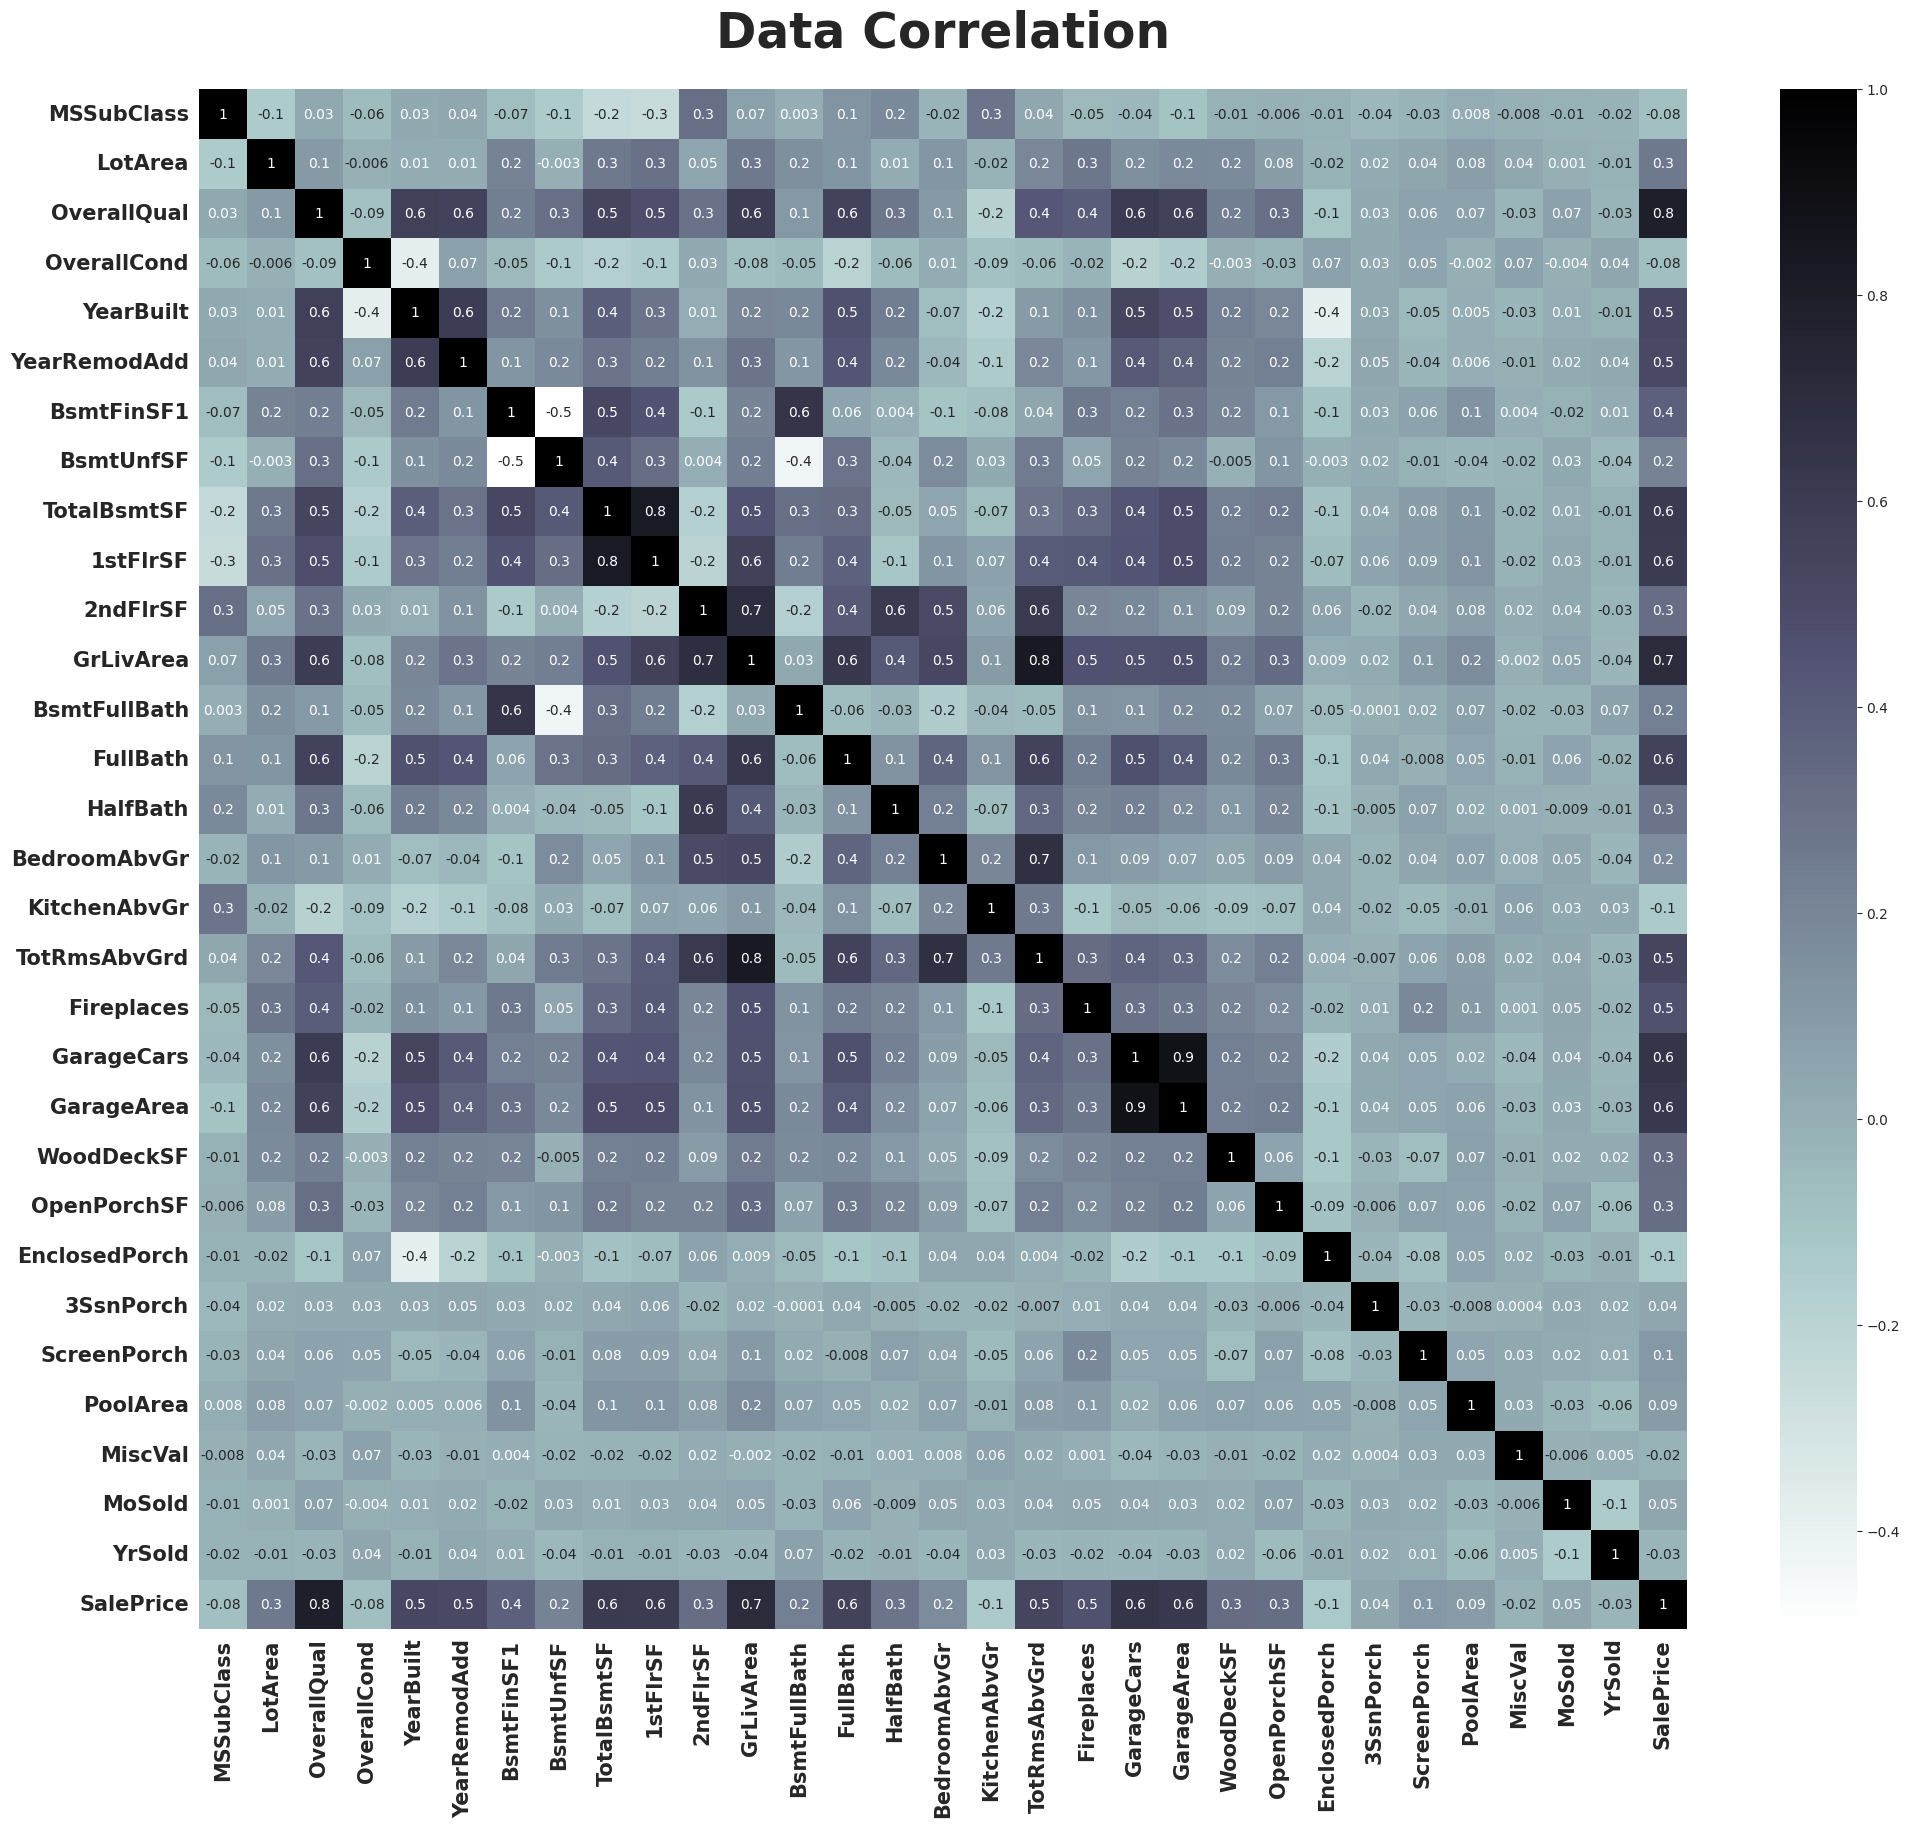

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(24, 20))
sns.heatmap(data.corr(), annot=True, fmt=".1g", cmap="bone_r")
plt.title("Data Correlation", weight="bold", fontsize=35, pad=30)
plt.xticks(weight="bold", fontsize=15)
plt.yticks(weight="bold", fontsize=15, rotation="horizontal");

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [ ]:
net = LinearRegression()

In [ ]:
net.fit(X_train, y_train)

LinearRegression()